In [45]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split


# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19     3.4              10.0        102   
4          136         mpfi  3.19     3.4               8.0        115   

   peak-rpm city-mpg highway-mpg  price  
0      5000       21          27  13495  
1      5000       21          27  16500  
2      5000       19          26  16500  
3      5500       24          30  13950  
4      5500       18          22  17450  

[5 rows x 26 columns]

In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
df.shape

(202, 26)

In [5]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns
num_column

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
object_column = df.select_dtypes(include=['object']).columns
object_column

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')

In [46]:
col_obj_to_num = []

for index, column in enumerate(object_column):
    is_numeric = df[column].str.match(r'^-?\d+(\.\d+)?$')
    num_count = is_numeric.sum()
    text_count = len(df[column]) - num_count

    percent_num = float(((num_count/len(df[column])) * 100))
    percent_text = float(((text_count/len(df[column])) * 100))
    
    if percent_num > 95:
        col_obj_to_num.append(column)

print(f'Columns with missing values : \n{col_obj_to_num}')

Columns with missing values : 
['bore', 'stroke', 'horsepower', 'peak-rpm']


In [11]:
df[col_obj_to_num]

bore stroke horsepower peak-rpm
0    3.47   2.68        111     5000
1    3.47   2.68        111     5000
2    2.68   3.47        154     5000
3    3.19    3.4        102     5500
4    3.19    3.4        115     5500
..    ...    ...        ...      ...
197  3.78   3.15        160     5300
198  3.58   2.87        134     5500
199  3.01    3.4        106     4800
200  3.78   3.15        114     5400
201  3.78   3.15        114     5400

[202 rows x 4 columns]

In [12]:
for index, column in enumerate(col_obj_to_num):
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [13]:
df_num_merge = pd.concat([df[num_column], df[col_obj_to_num]], axis=1)
df_num_merge.head()

symboling  normalized-losses  wheel-base  length  width  height  \
0          3                NaN        88.6   168.8   64.1    48.8   
1          3                NaN        88.6   168.8   64.1    48.8   
2          1                NaN        94.5   171.2   65.5    52.4   
3          2              164.0        99.8   176.6   66.2    54.3   
4          2              164.0        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  compression-ratio  city-mpg  highway-mpg  price  \
0         2548          130                9.0        21           27  13495   
1         2548          130                9.0        21           27  16500   
2         2823          152                9.0        19           26  16500   
3         2337          109               10.0        24           30  13950   
4         2824          136                8.0        18           22  17450   

   bore  stroke  horsepower  peak-rpm  
0  3.47    2.68       111.0    5000.0  
1  3.47    2.68       111.0    5000.0  
2  2.68    3.47       154.0    5000.0  
3  3.19    3.40       102.0    5500.0  
4  3.19    3.40       115.0    5500.0

In [14]:
df_num_merge.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
compression-ratio     0
city-mpg              0
highway-mpg           0
price                 0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [15]:
def nullRemover(df):
    for index, col in enumerate(df.columns):
        if is_numeric_dtype(df[col]):
            means = df[col].mean()
            df[col] = df[col].fillna(means)
    return df

In [16]:
nullRemover(df_num_merge)

symboling  normalized-losses  wheel-base  length  width  height  \
0            3         121.836364        88.6   168.8   64.1    48.8   
1            3         121.836364        88.6   168.8   64.1    48.8   
2            1         121.836364        94.5   171.2   65.5    52.4   
3            2         164.000000        99.8   176.6   66.2    54.3   
4            2         164.000000        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
197         -1          95.000000       109.1   188.8   68.8    55.5   
198         -1          95.000000       109.1   188.8   68.9    55.5   
199         -1          95.000000       109.1   188.8   68.9    55.5   
200         -1          95.000000       109.1   188.8   68.9    55.5   
201         -1          95.000000       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  compression-ratio  city-mpg  highway-mpg  \
0           2548          130                9.0        21           27   
1           2548          130                9.0        21           27   
2           2823          152                9.0        19           26   
3           2337          109               10.0        24           30   
4           2824          136                8.0        18           22   
..           ...          ...                ...       ...          ...   
197         3049          141                8.7        19           25   
198         3012          173                8.8        18           23   
199         3217          145               23.0        26           27   
200         3062          141                9.5        19           25   
201         3062          141                9.5        19           25   

     price  bore  stroke  horsepower  peak-rpm  
0    13495  3.47    2.68       111.0    5000.0  
1    16500  3.47    2.68       111.0    5000.0  
2    16500  2.68    3.47       154.0    5000.0  
3    13950  3.19    3.40       102.0    5500.0  
4    17450  3.19    3.40       115.0    5500.0  
..     ...   ...     ...         ...       ...  
197  19045  3.78    3.15       160.0    5300.0  
198  21485  3.58    2.87       134.0    5500.0  
199  22470  3.01    3.40       106.0    4800.0  
200  22625  3.78    3.15       114.0    5400.0  
201  22625  3.78    3.15       114.0    5400.0  

[202 rows x 16 columns]

In [18]:
df_num_merge.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
price                0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [19]:
df_object_column = df.select_dtypes(include=['object'])
df_object_column

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std          two  convertible          rwd   
1    alfa-romero       gas        std          two  convertible          rwd   
2    alfa-romero       gas        std          two    hatchback          rwd   
3           audi       gas        std         four        sedan          fwd   
4           audi       gas        std         four        sedan          4wd   
..           ...       ...        ...          ...          ...          ...   
197        volvo       gas      turbo         four        sedan          rwd   
198        volvo       gas        std         four        sedan          rwd   
199        volvo    diesel      turbo         four        sedan          rwd   
200        volvo       gas      turbo         four        sedan          rwd   
201        volvo       gas      turbo         four        sedan          rwd   

    engine-location engine-type num-of-cylinders fuel-system  
0             front        dohc             four        mpfi  
1             front        dohc             four        mpfi  
2             front        ohcv              six        mpfi  
3             front         ohc             four        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
197           front         ohc             four        mpfi  
198           front        ohcv              six        mpfi  
199           front         ohc              six         idi  
200           front         ohc             four        mpfi  
201           front         ohc             four        mpfi  

[202 rows x 10 columns]

In [20]:
df_merge_all = pd.concat([df_num_merge, df_object_column], axis=1)
df_merge_all

symboling  normalized-losses  wheel-base  length  width  height  \
0            3         121.836364        88.6   168.8   64.1    48.8   
1            3         121.836364        88.6   168.8   64.1    48.8   
2            1         121.836364        94.5   171.2   65.5    52.4   
3            2         164.000000        99.8   176.6   66.2    54.3   
4            2         164.000000        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
197         -1          95.000000       109.1   188.8   68.8    55.5   
198         -1          95.000000       109.1   188.8   68.9    55.5   
199         -1          95.000000       109.1   188.8   68.9    55.5   
200         -1          95.000000       109.1   188.8   68.9    55.5   
201         -1          95.000000       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  compression-ratio  city-mpg  ...         make  \
0           2548          130                9.0        21  ...  alfa-romero   
1           2548          130                9.0        21  ...  alfa-romero   
2           2823          152                9.0        19  ...  alfa-romero   
3           2337          109               10.0        24  ...         audi   
4           2824          136                8.0        18  ...         audi   
..           ...          ...                ...       ...  ...          ...   
197         3049          141                8.7        19  ...        volvo   
198         3012          173                8.8        18  ...        volvo   
199         3217          145               23.0        26  ...        volvo   
200         3062          141                9.5        19  ...        volvo   
201         3062          141                9.5        19  ...        volvo   

     fuel-type  aspiration  num-of-doors   body-style  drive-wheels  \
0          gas         std           two  convertible           rwd   
1          gas         std           two  convertible           rwd   
2          gas         std           two    hatchback           rwd   
3          gas         std          four        sedan           fwd   
4          gas         std          four        sedan           4wd   
..         ...         ...           ...          ...           ...   
197        gas       turbo          four        sedan           rwd   
198        gas         std          four        sedan           rwd   
199     diesel       turbo          four        sedan           rwd   
200        gas       turbo          four        sedan           rwd   
201        gas       turbo          four        sedan           rwd   

    engine-location engine-type num-of-cylinders fuel-system  
0             front        dohc             four        mpfi  
1             front        dohc             four        mpfi  
2             front        ohcv              six        mpfi  
3             front         ohc             four        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
197           front         ohc             four        mpfi  
198           front        ohcv              six        mpfi  
199           front         ohc              six         idi  
200           front         ohc             four        mpfi  
201           front         ohc             four        mpfi  

[202 rows x 26 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

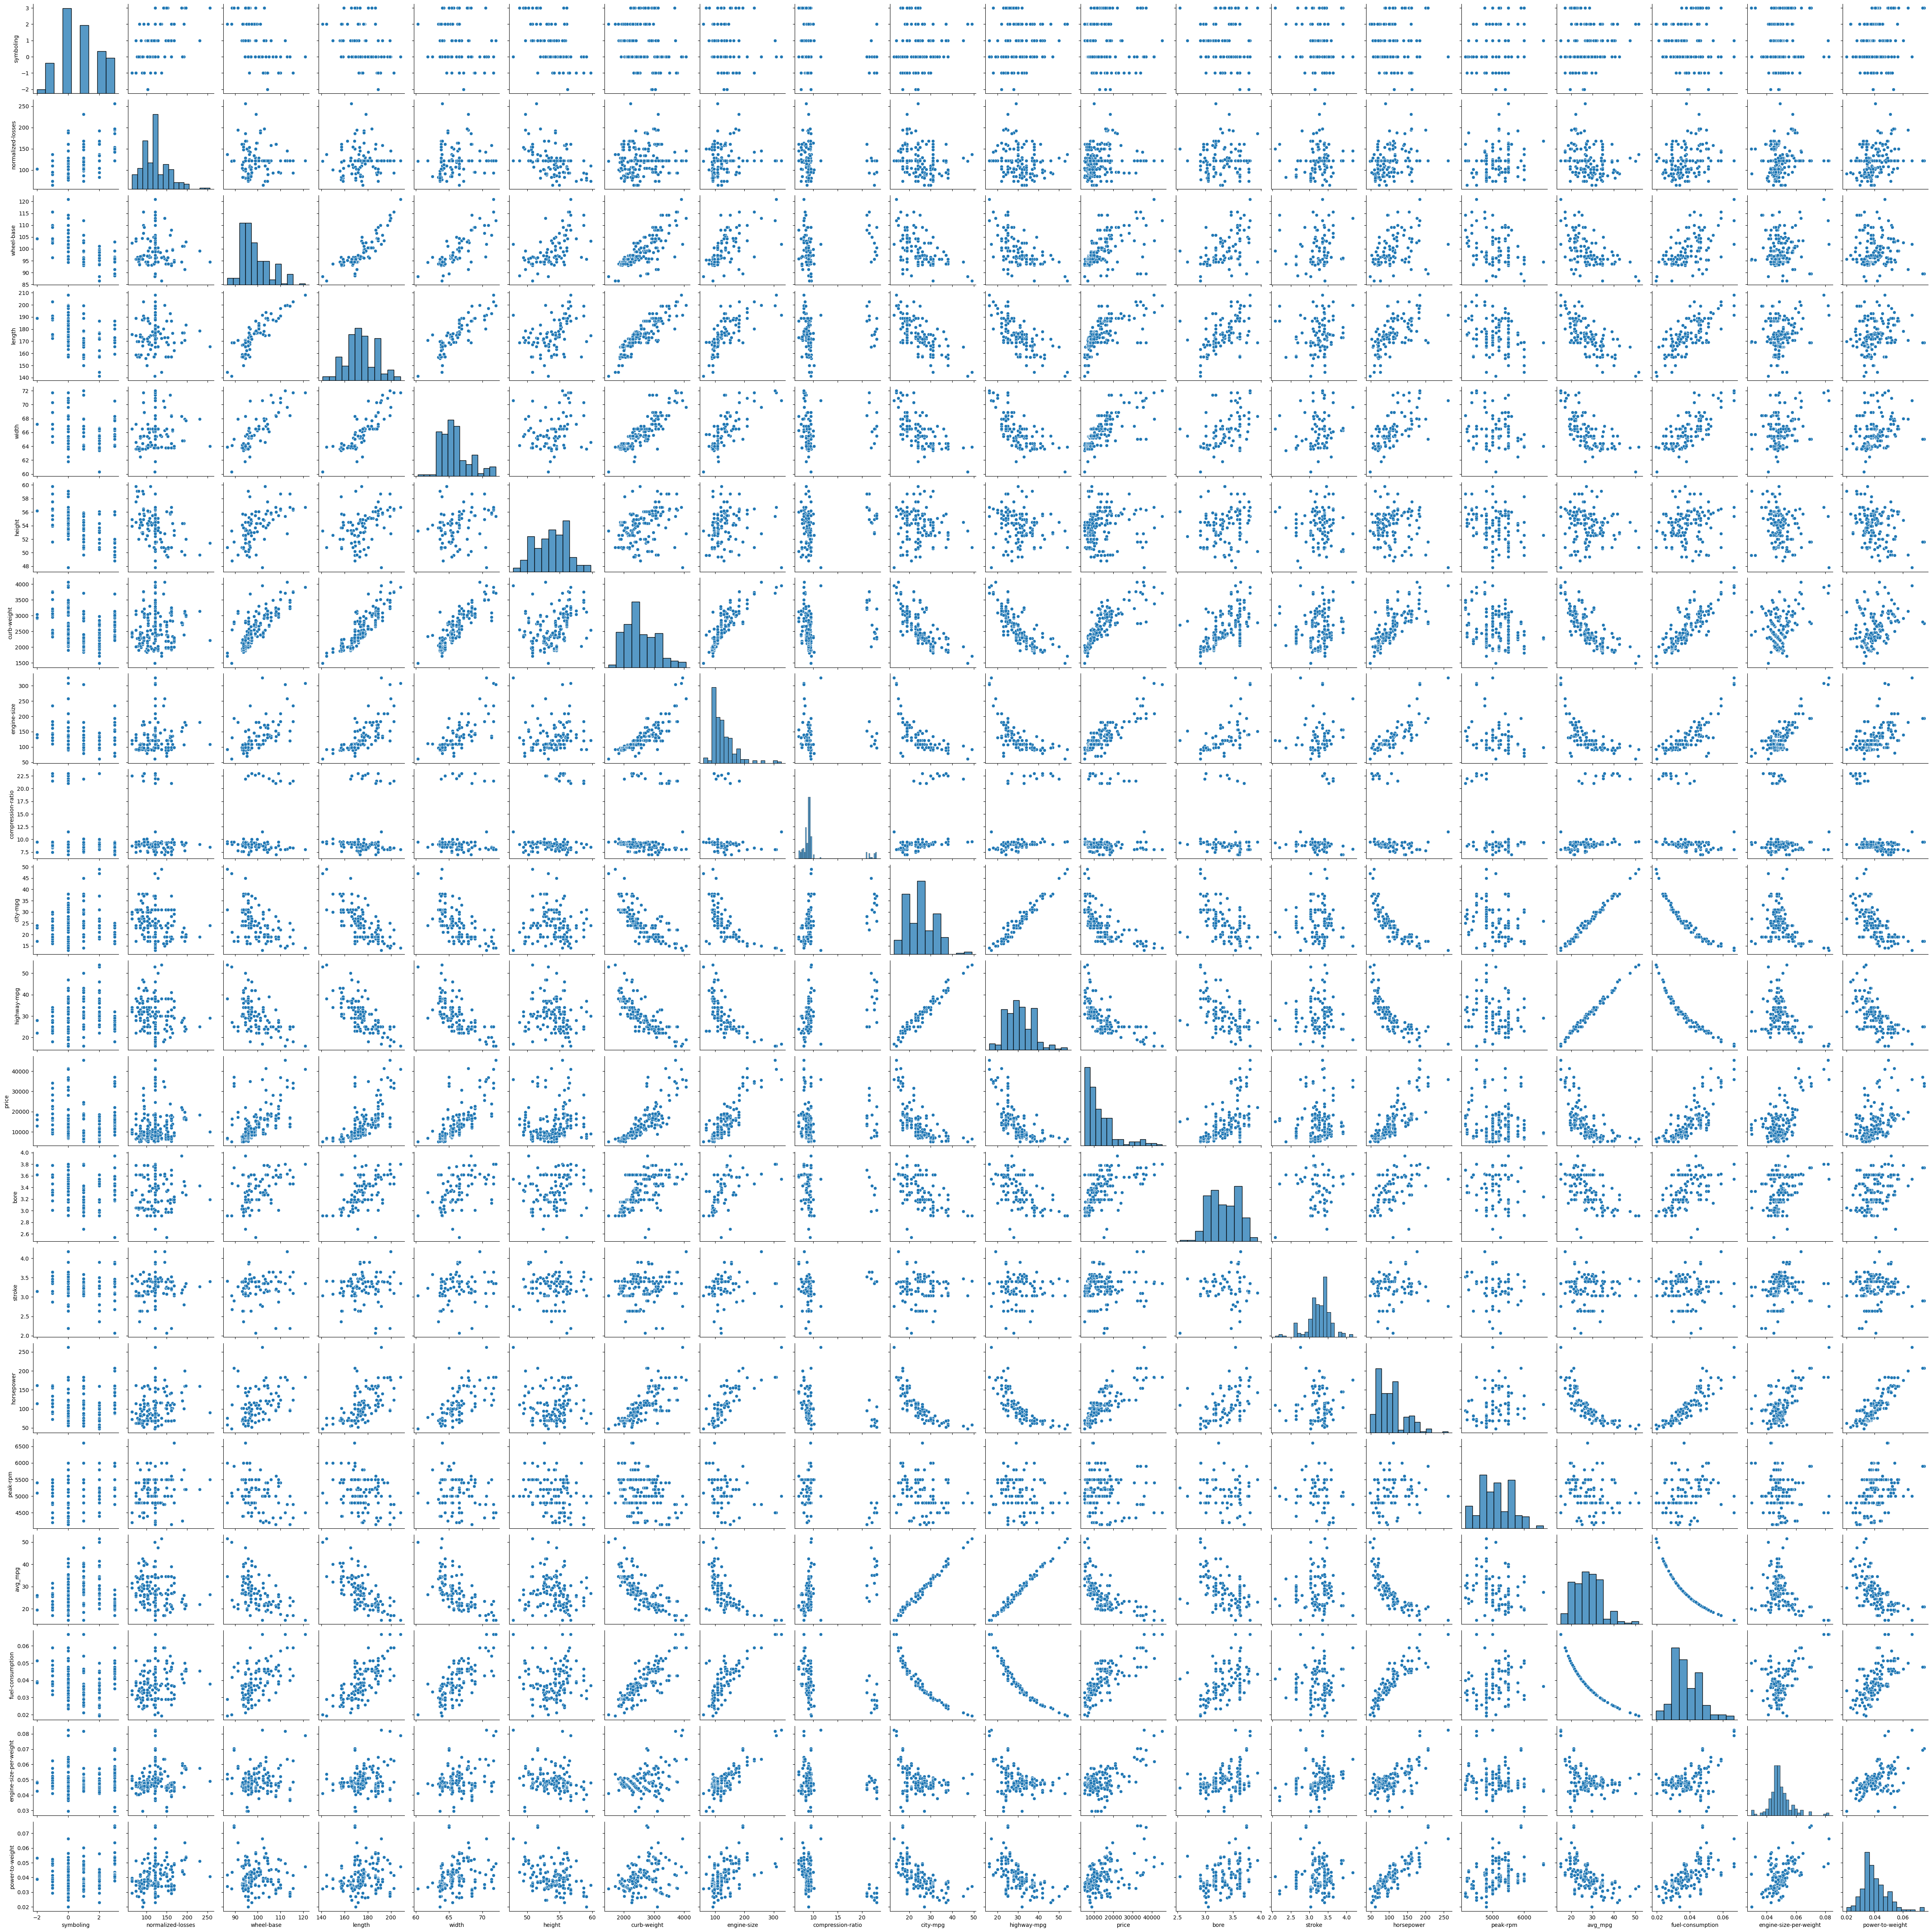

In [47]:
sns.pairplot(df_merge_all)
plt.show

In [21]:
df_merge_all['avg_mpg'] = (df['city-mpg']+df['highway-mpg'])/2
df_merge_all['fuel-consumption'] =  1 / df_merge_all['avg_mpg']
df_merge_all['engine-size-per-weight'] = df['engine-size'] / df['curb-weight']
df_merge_all['power-to-weight'] = df['horsepower'] / df['curb-weight']

In [22]:
df_number = df_merge_all.select_dtypes(include=['int64', 'float64'])
df_number

symboling  normalized-losses  wheel-base  length  width  height  \
0            3         121.836364        88.6   168.8   64.1    48.8   
1            3         121.836364        88.6   168.8   64.1    48.8   
2            1         121.836364        94.5   171.2   65.5    52.4   
3            2         164.000000        99.8   176.6   66.2    54.3   
4            2         164.000000        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
197         -1          95.000000       109.1   188.8   68.8    55.5   
198         -1          95.000000       109.1   188.8   68.9    55.5   
199         -1          95.000000       109.1   188.8   68.9    55.5   
200         -1          95.000000       109.1   188.8   68.9    55.5   
201         -1          95.000000       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  compression-ratio  city-mpg  highway-mpg  \
0           2548          130                9.0        21           27   
1           2548          130                9.0        21           27   
2           2823          152                9.0        19           26   
3           2337          109               10.0        24           30   
4           2824          136                8.0        18           22   
..           ...          ...                ...       ...          ...   
197         3049          141                8.7        19           25   
198         3012          173                8.8        18           23   
199         3217          145               23.0        26           27   
200         3062          141                9.5        19           25   
201         3062          141                9.5        19           25   

     price  bore  stroke  horsepower  peak-rpm  avg_mpg  fuel-consumption  \
0    13495  3.47    2.68       111.0    5000.0     24.0          0.041667   
1    16500  3.47    2.68       111.0    5000.0     24.0          0.041667   
2    16500  2.68    3.47       154.0    5000.0     22.5          0.044444   
3    13950  3.19    3.40       102.0    5500.0     27.0          0.037037   
4    17450  3.19    3.40       115.0    5500.0     20.0          0.050000   
..     ...   ...     ...         ...       ...      ...               ...   
197  19045  3.78    3.15       160.0    5300.0     22.0          0.045455   
198  21485  3.58    2.87       134.0    5500.0     20.5          0.048780   
199  22470  3.01    3.40       106.0    4800.0     26.5          0.037736   
200  22625  3.78    3.15       114.0    5400.0     22.0          0.045455   
201  22625  3.78    3.15       114.0    5400.0     22.0          0.045455   

     engine-size-per-weight  power-to-weight  
0                  0.051020         0.043564  
1                  0.051020         0.043564  
2                  0.053843         0.054552  
3                  0.046641         0.043646  
4                  0.048159         0.040722  
..                      ...              ...  
197                0.046245         0.052476  
198                0.057437         0.044489  
199                0.045073         0.032950  
200                0.046048         0.037231  
201                0.046048         0.037231  

[202 rows x 20 columns]

In [23]:
df_number.to_csv('df_number.csv')

In [24]:
df_object = df_merge_all.select_dtypes(include=['object'])
df_object

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std          two  convertible          rwd   
1    alfa-romero       gas        std          two  convertible          rwd   
2    alfa-romero       gas        std          two    hatchback          rwd   
3           audi       gas        std         four        sedan          fwd   
4           audi       gas        std         four        sedan          4wd   
..           ...       ...        ...          ...          ...          ...   
197        volvo       gas      turbo         four        sedan          rwd   
198        volvo       gas        std         four        sedan          rwd   
199        volvo    diesel      turbo         four        sedan          rwd   
200        volvo       gas      turbo         four        sedan          rwd   
201        volvo       gas      turbo         four        sedan          rwd   

    engine-location engine-type num-of-cylinders fuel-system  
0             front        dohc             four        mpfi  
1             front        dohc             four        mpfi  
2             front        ohcv              six        mpfi  
3             front         ohc             four        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
197           front         ohc             four        mpfi  
198           front        ohcv              six        mpfi  
199           front         ohc              six         idi  
200           front         ohc             four        mpfi  
201           front         ohc             four        mpfi  

[202 rows x 10 columns]

In [25]:
df_object.to_csv('df_object.csv')

In [26]:
df_merge_all.isnull().sum()

symboling                 0
normalized-losses         0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-size               0
compression-ratio         0
city-mpg                  0
highway-mpg               0
price                     0
bore                      0
stroke                    0
horsepower                0
peak-rpm                  0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
engine-location           0
engine-type               0
num-of-cylinders          0
fuel-system               0
avg_mpg                   0
fuel-consumption          0
engine-size-per-weight    0
power-to-weight           2
dtype: int64

In [27]:
nullRemover(df_merge_all)

symboling  normalized-losses  wheel-base  length  width  height  \
0            3         121.836364        88.6   168.8   64.1    48.8   
1            3         121.836364        88.6   168.8   64.1    48.8   
2            1         121.836364        94.5   171.2   65.5    52.4   
3            2         164.000000        99.8   176.6   66.2    54.3   
4            2         164.000000        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
197         -1          95.000000       109.1   188.8   68.8    55.5   
198         -1          95.000000       109.1   188.8   68.9    55.5   
199         -1          95.000000       109.1   188.8   68.9    55.5   
200         -1          95.000000       109.1   188.8   68.9    55.5   
201         -1          95.000000       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  compression-ratio  city-mpg  ...   body-style  \
0           2548          130                9.0        21  ...  convertible   
1           2548          130                9.0        21  ...  convertible   
2           2823          152                9.0        19  ...    hatchback   
3           2337          109               10.0        24  ...        sedan   
4           2824          136                8.0        18  ...        sedan   
..           ...          ...                ...       ...  ...          ...   
197         3049          141                8.7        19  ...        sedan   
198         3012          173                8.8        18  ...        sedan   
199         3217          145               23.0        26  ...        sedan   
200         3062          141                9.5        19  ...        sedan   
201         3062          141                9.5        19  ...        sedan   

     drive-wheels  engine-location  engine-type  num-of-cylinders  \
0             rwd            front         dohc              four   
1             rwd            front         dohc              four   
2             rwd            front         ohcv               six   
3             fwd            front          ohc              four   
4             4wd            front          ohc              five   
..            ...              ...          ...               ...   
197           rwd            front          ohc              four   
198           rwd            front         ohcv               six   
199           rwd            front          ohc               six   
200           rwd            front          ohc              four   
201           rwd            front          ohc              four   

     fuel-system avg_mpg fuel-consumption engine-size-per-weight  \
0           mpfi    24.0         0.041667               0.051020   
1           mpfi    24.0         0.041667               0.051020   
2           mpfi    22.5         0.044444               0.053843   
3           mpfi    27.0         0.037037               0.046641   
4           mpfi    20.0         0.050000               0.048159   
..           ...     ...              ...                    ...   
197         mpfi    22.0         0.045455               0.046245   
198         mpfi    20.5         0.048780               0.057437   
199          idi    26.5         0.037736               0.045073   
200         mpfi    22.0         0.045455               0.046048   
201         mpfi    22.0         0.045455               0.046048   

    power-to-weight  
0          0.043564  
1          0.043564  
2          0.054552  
3          0.043646  
4          0.040722  
..              ...  
197        0.052476  
198        0.044489  
199        0.032950  
200        0.037231  
201        0.037231  

[202 rows x 30 columns]

In [28]:
df_merge_all.isnull().sum()

symboling                 0
normalized-losses         0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-size               0
compression-ratio         0
city-mpg                  0
highway-mpg               0
price                     0
bore                      0
stroke                    0
horsepower                0
peak-rpm                  0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
engine-location           0
engine-type               0
num-of-cylinders          0
fuel-system               0
avg_mpg                   0
fuel-consumption          0
engine-size-per-weight    0
power-to-weight           0
dtype: int64

In [29]:
X = df_merge_all.drop(['price'], axis=1)
X.head()

symboling  normalized-losses  wheel-base  length  width  height  \
0          3         121.836364        88.6   168.8   64.1    48.8   
1          3         121.836364        88.6   168.8   64.1    48.8   
2          1         121.836364        94.5   171.2   65.5    52.4   
3          2         164.000000        99.8   176.6   66.2    54.3   
4          2         164.000000        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  compression-ratio  city-mpg  ...   body-style  \
0         2548          130                9.0        21  ...  convertible   
1         2548          130                9.0        21  ...  convertible   
2         2823          152                9.0        19  ...    hatchback   
3         2337          109               10.0        24  ...        sedan   
4         2824          136                8.0        18  ...        sedan   

   drive-wheels  engine-location  engine-type  num-of-cylinders fuel-system  \
0           rwd            front         dohc              four        mpfi   
1           rwd            front         dohc              four        mpfi   
2           rwd            front         ohcv               six        mpfi   
3           fwd            front          ohc              four        mpfi   
4           4wd            front          ohc              five        mpfi   

  avg_mpg fuel-consumption engine-size-per-weight power-to-weight  
0    24.0         0.041667               0.051020        0.043564  
1    24.0         0.041667               0.051020        0.043564  
2    22.5         0.044444               0.053843        0.054552  
3    27.0         0.037037               0.046641        0.043646  
4    20.0         0.050000               0.048159        0.040722  

[5 rows x 29 columns]

In [30]:
X.isnull().sum()

symboling                 0
normalized-losses         0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-size               0
compression-ratio         0
city-mpg                  0
highway-mpg               0
bore                      0
stroke                    0
horsepower                0
peak-rpm                  0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
engine-location           0
engine-type               0
num-of-cylinders          0
fuel-system               0
avg_mpg                   0
fuel-consumption          0
engine-size-per-weight    0
power-to-weight           0
dtype: int64

In [31]:
correlations = df_merge_all.select_dtypes(include=['int64', 'float64']).corr()
correlation_with_price = correlations['price'].sort_values(ascending=False)
correlation_with_price

price                     1.000000
engine-size               0.871051
curb-weight               0.835277
horsepower                0.808366
fuel-consumption          0.803595
width                     0.753236
length                    0.692774
engine-size-per-weight    0.588900
wheel-base                0.588382
bore                      0.547298
power-to-weight           0.509506
height                    0.139003
normalized-losses         0.127440
stroke                    0.079972
compression-ratio         0.069881
symboling                -0.090242
peak-rpm                 -0.097647
city-mpg                 -0.688254
avg_mpg                  -0.702257
highway-mpg              -0.705924
Name: price, dtype: float64

Text(0.5, 1.0, 'Highly correlated features with Price')

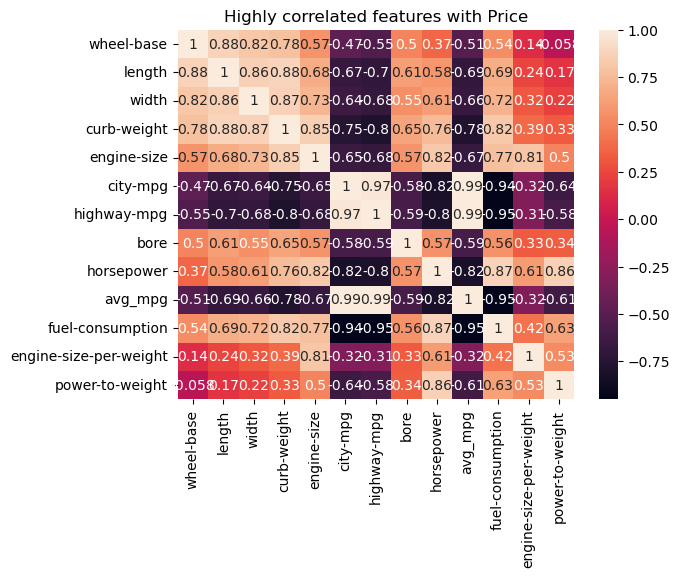

In [32]:
# Correlation heatmap with respect to Price
high_corr_feature = []
target = 'price'

for col in df_merge_all.columns:
    if is_numeric_dtype(df_merge_all[col]):
            if col != target:
                high_corr_val = df_merge_all[target].corr(df_merge_all[col])
                if abs(high_corr_val) >= 0.5 and abs(high_corr_val) <= 1:
                    high_corr_feature.append(col)
                    
sns.heatmap(df_merge_all[high_corr_feature].corr(), annot=True)
plt.title('Highly correlated features with Price')

In [33]:
Y = df_merge_all.price
Y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
197    19045
198    21485
199    22470
200    22625
201    22625
Name: price, Length: 202, dtype: int64

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, 
                                                test_size=0.30, 
                                                random_state=2)


In [35]:
xTrain.shape

(141, 29)

In [36]:
number_array = np.array(X.select_dtypes(include=['int64', 'float64']).columns)
text_array = np.array(X.select_dtypes(include=['object']).columns)

In [37]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), number_array),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), text_array)
    ])

preprocess_transformed = preprocess.fit_transform(X)
print(preprocess_transformed)

[[ 1.72741085  0.         -1.68569083 ...  1.          0.
   0.        ]
 [ 1.72741085  0.         -1.68569083 ...  1.          0.
   0.        ]
 [ 0.13409125  0.         -0.71520325 ...  1.          0.
   0.        ]
 ...
 [-1.45922834 -0.84143038  1.68634227 ...  0.          0.
   0.        ]
 [-1.45922834 -0.84143038  1.68634227 ...  1.          0.
   0.        ]
 [-1.45922834 -0.84143038  1.68634227 ...  1.          0.
   0.        ]]


In [38]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

pipeline.fit(xTrain, yTrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio',
       'city-mpg', 'highway-mpg', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'avg_mpg', 'fuel-consumption',
       'engine-size-per-weight', 'power-to-weight'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  array(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'], dtype=object))])),
                ('model', LinearRegression())])

In [39]:
score_training_lr = pipeline.score(xTrain, yTrain)
score_training_lr

0.9843938167147503

In [40]:
pipeline.fit(xTest, yTest)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio',
       'city-mpg', 'highway-mpg', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'avg_mpg', 'fuel-consumption',
       'engine-size-per-weight', 'power-to-weight'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  array(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'], dtype=object))])),
                ('model', LinearRegression())])

In [41]:
score_test_lr = pipeline.score(xTest, yTest)
score_test_lr

0.9988126914584368

In [42]:
y_pred_lr = pipeline.predict(xTrain)
y_pred_lr


array([ 7224.52264801, 13035.30195777, 14446.49995912, 16466.23912139,
       -1187.16626166,  7064.62542586,  9626.08640191,  1217.039944  ,
       34316.76399532, 24433.14580764, 17758.76586561, 14728.87448367,
       24433.14580764, 28817.21524392,  2453.96482327,  5653.83125229,
       68761.45278611,  4713.21212478,  5635.08527374, 12308.2320132 ,
       21183.04856566, 17879.63189691, 12766.0950623 , 11912.34173835,
       10466.17192892, 13011.19537017, 10679.34598352, 68761.45278611,
         451.96565331, -2914.0167088 ,  5633.13095012,  8325.56785317,
        2717.8138095 , -3882.62992295, 14311.13150962, 14368.12005971,
        5557.9032198 , 19185.76911297, 12317.23458793,  2596.22194298,
        8476.37295749,  8002.39142068, 13791.59471102, 15193.38076625,
        4622.78548044,  7824.60818678,  7042.57903847,  4826.88389366,
        8166.51940827, 10224.2474648 , 35451.63856735,  8444.60324102,
        7365.12703083, 17751.3507587 ,  8675.96869852, 14460.3787728 ,
      

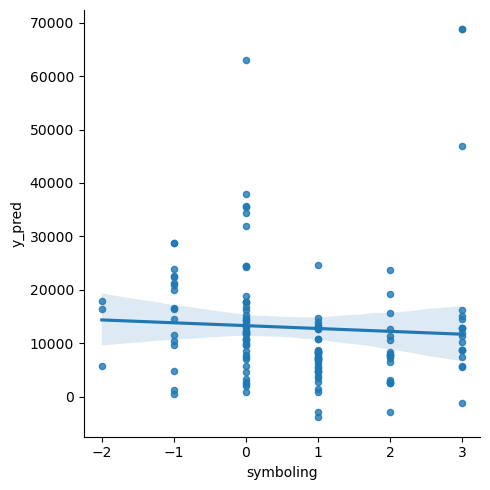

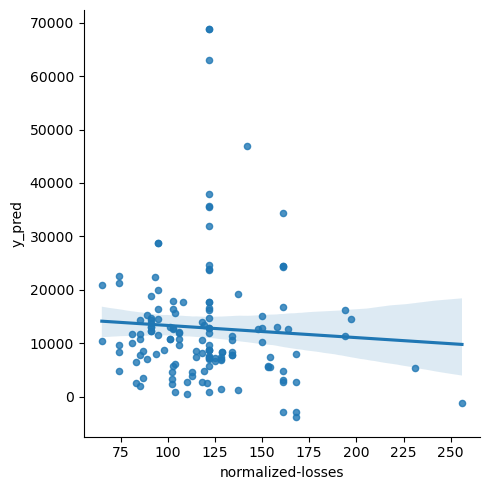

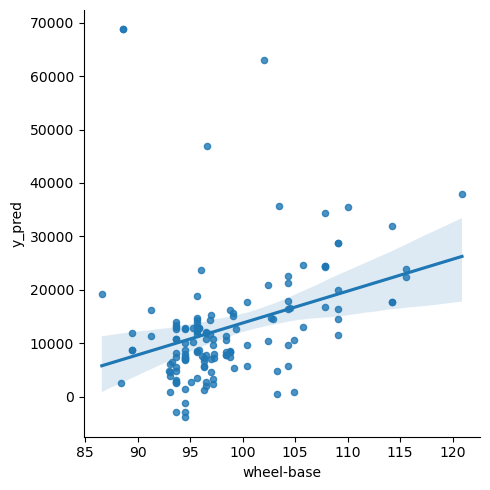

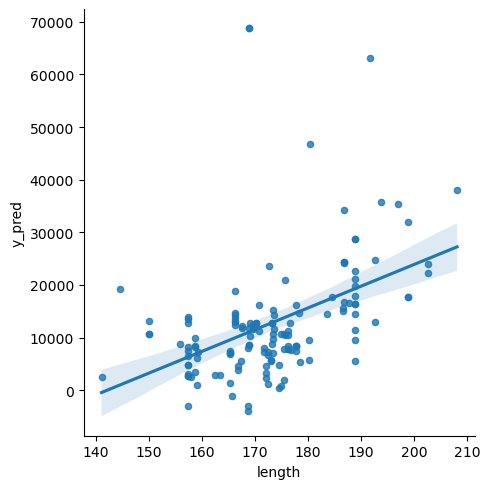

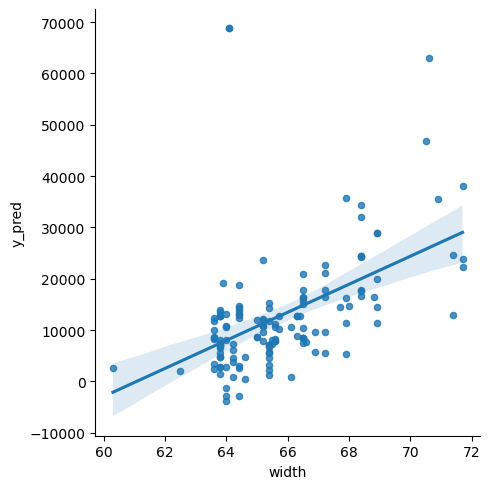

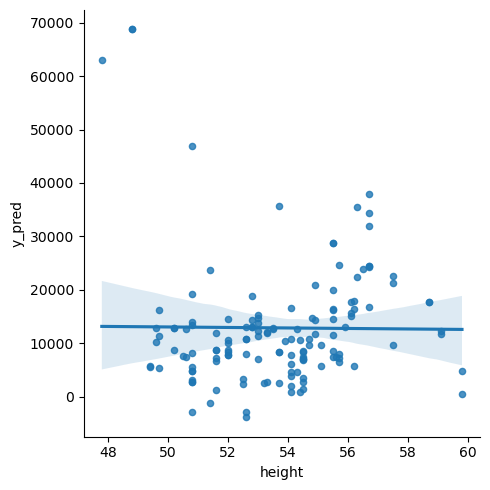

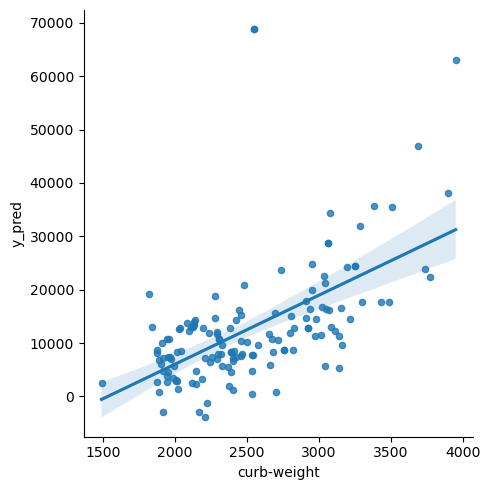

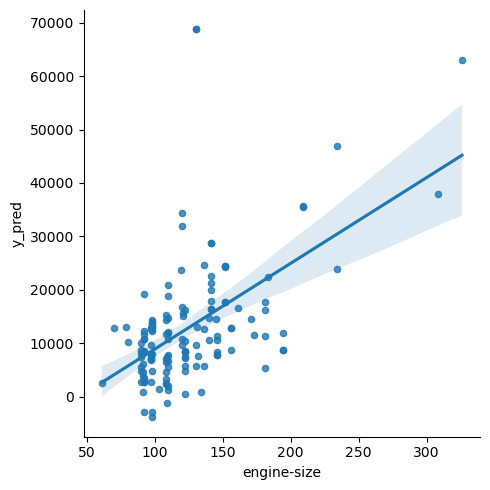

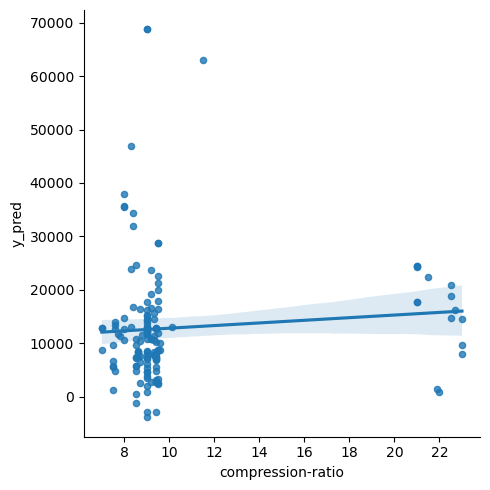

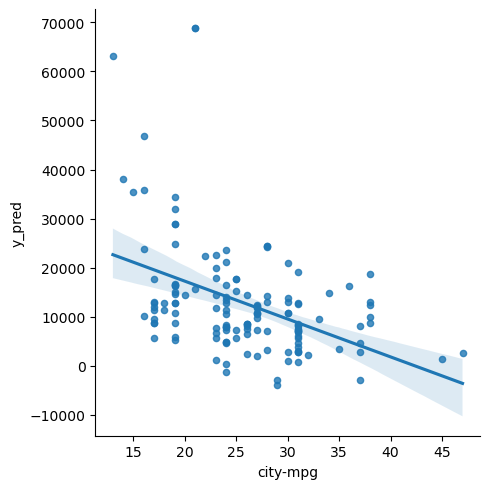

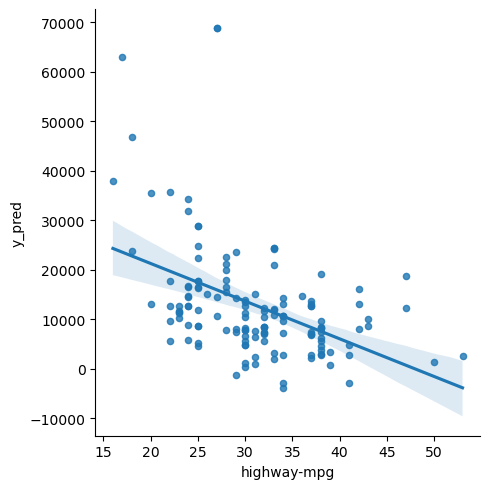

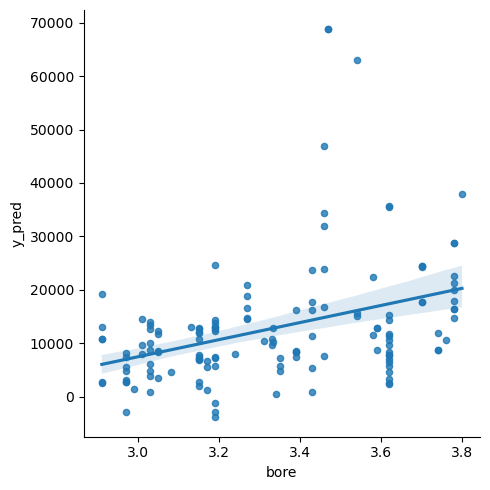

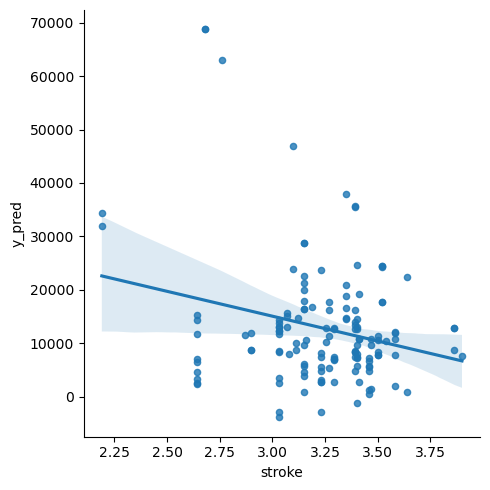

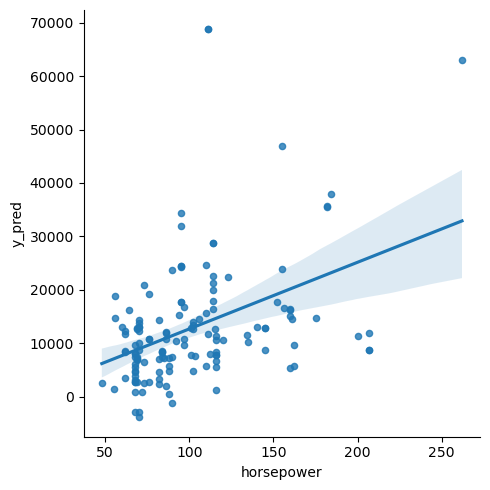

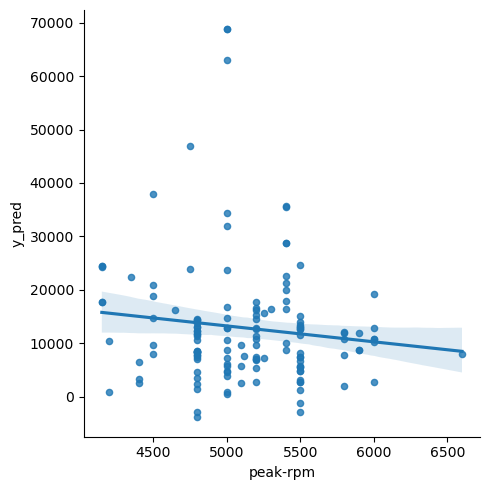

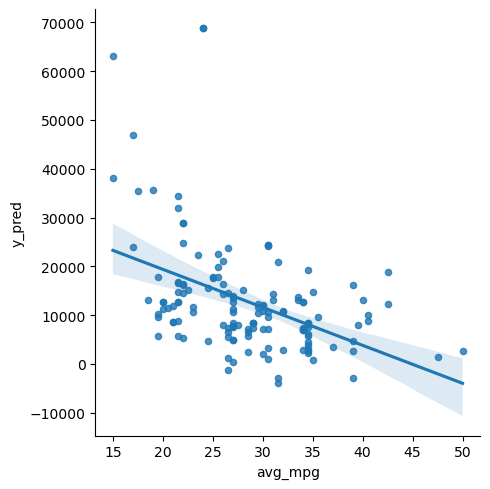

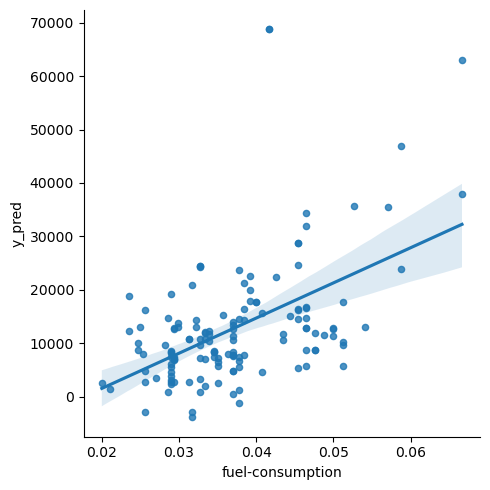

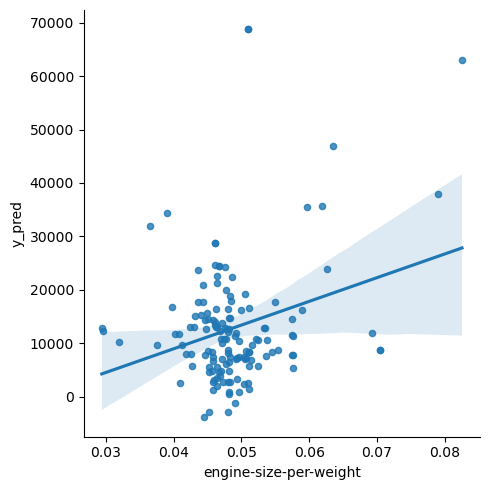

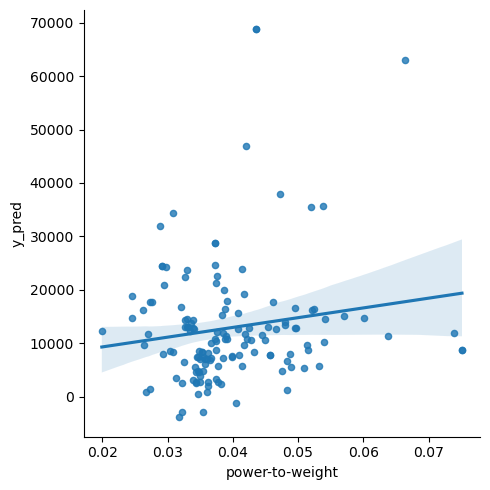

In [44]:
training_plot = xTrain.copy()
training_plot['y_pred'] = y_pred_lr

for i in X.columns:
    if is_numeric_dtype(X[i]):
        sns.lmplot(x=i, y='y_pred', data=training_plot, scatter_kws={'s':20})